# Fourier compression of an image
* If you have no idea what Fourier transform (FT) is, check the introduction NB here (link in the video description).
* The idea is simple, let's apply FT on an image, that means two-dimensional FT
* See how it looks, apply a filter and FT back (called inverse FT).
* Check how well the compression works.

## The image I picked is of Mr Joseph Fourier himself

In [62]:
# module import
from PIL import Image,ImageOps
import scipy.fftpack as fp

import numpy as np
import matplotlib.pyplot as plt

### Plot the beauty of Joseph Fourier
portrait from [wikipedia](https://en.wikipedia.org/wiki/Joseph_Fourier#/media/File:Fourier2_-_restoration1.jpg) and converted to grayscale.


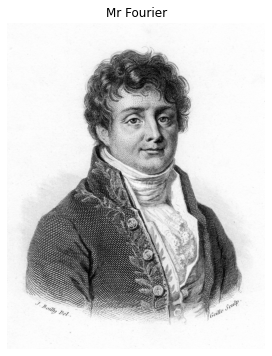

In [64]:
# image loading
img = Image.open('../../resource/fig/fourier_greyscale.png').convert('L')

# plotting
plt.figure(figsize=(8, 6))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Mr Fourier')
plt.show()

### Apply FT
* `fft.fft2` is two-dimensional FT, for 1D, use `fft.fft`
* For nicer display, `fft.fftshift` takes care of the symmetry of the FT and shifts 0 frequency to center of the image.

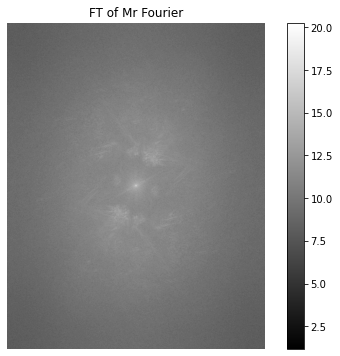

In [63]:
img_ft = np.fft.fftshift(np.fft.fft2(img))

plt.figure(figsize=(8, 6))
plt.imshow(np.log(abs(img_ft)), cmap='gray')
plt.colorbar()
plt.axis('off')
plt.title('FT of Mr Fourier')
plt.show()


* The white regions are the frequencies with high amplitudes (lot of information content).
* The center point is the ZERO frequency point, more to the edges will be higher frequencies, meaning more detailed features of the image.
* Higher frequencies are less bright, therefore we throw them out. This way we make the image smaller, but at the same time compressed in storage size.
### Filtering Sir Joseph down

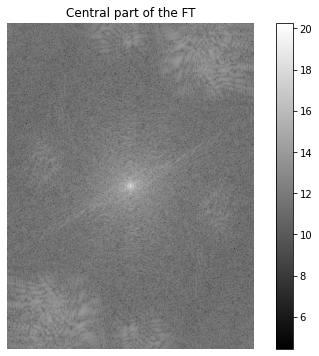

In [73]:
# cutting 800 rows from the begining and end
# and 640 columns from beggining and end of the 2D array
# I go from index 800 or 640 until last minus the number (800 or 640) of rows/cols
img_ft_small = img_ft[800:-800, 640:-640]
plt.figure(figsize=(8, 6))
plt.imshow(np.log(abs(img_ft_small)), cmap='gray')
plt.colorbar()
plt.axis('off')
plt.title('Central part of the FT')
plt.show()

### Going back I first apply shift function (inner one) and then the iFFT (outer function)

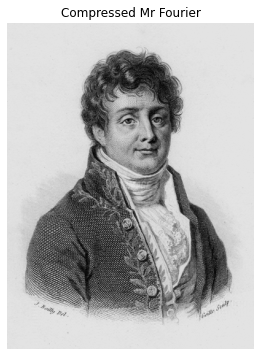

In [74]:
img_filt = np.fft.ifft2(np.fft.ifftshift(img_ft_small))

plt.figure(figsize=(8, 6))
plt.imshow(abs(img_filt), cmap='gray')
plt.axis('off')
plt.title('Compressed Mr Fourier')
plt.show()

In [75]:
print('original shape in pixels (rows, columns): ', img_ft.shape)
print('filtered shape in pixels (rows, columns): ', img_filt.shape)
size_original = np.prod(img_ft.shape)  # product of number of rows * columns
size_compressed = np.prod(img_filt.shape)

original shape in pixels (rows, columns):  (2048, 1619)
filtered shape in pixels (rows, columns):  (448, 339)


### Compression ratio
* here calculated in a form of so called *space saving*.
* expressed in how many percents of storage I save.

In [76]:
100*(1-(size_compressed/size_original))

95.41962631253861

## Still a good Fourier, even after throwing out 95% of his pixels, good job and see ya!

### Questions:
1. How far can you push the filtering without seeing obvious blurring?